In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [9]:
plt.style.use('az-paper-twocol.mplstyle')
x = np.array([-2.398, -1.398, -0.398, 0.699, 1.699, 2.74])
y = np.array([-2.523, -2.0, -1.523, -1.0, -0.523, 0.0])
f = interp1d(x,y, fill_value='extrapolate') # f is g_psy which produces correct relic density, dependent on DM mass

In [3]:
def compcos(x):
    ans = []
    if type(x) != list:
        x = [x]
    for val in x:
        if val >= 0:
            ans.append(np.cos(2*np.pi*np.sqrt(val)))
        else:
            ans.append(np.cosh(2*np.pi*np.sqrt(-val)))
            
    return ans

def Sommerfeld(a, c_param):
    ans = []
    ac = a*c_param
    for i, val in enumerate(ac):
        if c_param - val**2 >= 0:
            ans.append(np.pi/a[i]*np.sinh(2*np.pi*val)/(np.cosh(2*np.pi*val)-np.cos((c_param-val**2)**0.5))*((c_param-1)**2+4*val**2)/(1+4*val**2))
        else:
            ans.append(np.pi/a[i]*np.tanh(2*np.pi*val)/(1-np.cosh(np.pi/a[i])+np.tanh(2*np.pi*val)*np.sinh(np.pi/a[i]))*((c_param-1)**2+4*val**2)/(1+4*val**2))
    return ans
            

In [4]:
alpha1 = (10**f(2))**2/(4*np.pi)
m_phi1 = 0.01
m_DM1 = 100
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
a1 = vel/(2*alpha1)
c_param1 = 6*alpha1*m_DM1/(np.pi**2*m_phi1)
S1 = Sommerfeld(a1, c_param1)
ref1 = np.array([0.1/(2*alpha1)])
div1 = Sommerfeld(ref1, c_param1)
print(div1)
sigma_v1 = S1*(vel/0.1)**2/div1[0]

[1.5487799399625237]


In [5]:
alpha2 = (10**f(2))**2/(4*np.pi)
m_phi2 = 0.1
m_DM2 = 100
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
a2 = vel/(2*alpha2)
c_param2 = 6*alpha2*m_DM2/(np.pi**2*m_phi2)
S2 = Sommerfeld(a2, c_param2)
ref2 = np.array([0.1/(2*alpha2)])
div2 = Sommerfeld(ref2, c_param2)
sigma_v2 = S2*(vel/0.1)**2/div2[0]

In [6]:
alpha3 = (10**f(2.7))**2/(4*np.pi)
m_phi3 = 0.01
m_DM3 = 500
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
a3 = vel/(2*alpha3)
c_param3 = 6*alpha3*m_DM3/(np.pi**2*m_phi3)
S3 = Sommerfeld(a3, c_param3)
ref = np.array([0.1/(2*alpha3)])
div = Sommerfeld(ref, c_param3)
sigma_v3 = S3*(vel/0.1)**2/div[0]

<ipython-input-3-61a8a5d103ea>:20: RuntimeWarning: divide by zero encountered in double_scalars
  ans.append(np.pi/a[i]*np.tanh(2*np.pi*val)/(1-np.cosh(np.pi/a[i])+np.tanh(2*np.pi*val)*np.sinh(np.pi/a[i]))*((c_param-1)**2+4*val**2)/(1+4*val**2))


In [7]:
# np.cosh(2*np.pi*a*c_param)
print(a)
print(c_param)
print(((a*c_param)**2-c_param))

NameError: name 'a' is not defined

In [7]:
vel31 = vel[:649]
vel32 = vel[709:]
vel3 = [*vel31, *vel32]
sigma_v31 = sigma_v3[:649]
sigma_v32 = sigma_v3[709:]
sigma_v33 = [*sigma_v31, *sigma_v32]
print(len(vel3))
print(len(sigma_v33))
print(len(sigma_v1))
print(sigma_v3[648], sigma_v3[709])
vel4 = [vel[649],vel[708]]

841
841
901
11.30929217576353 2.851390474993255


<ipython-input-11-8c8395324b04>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


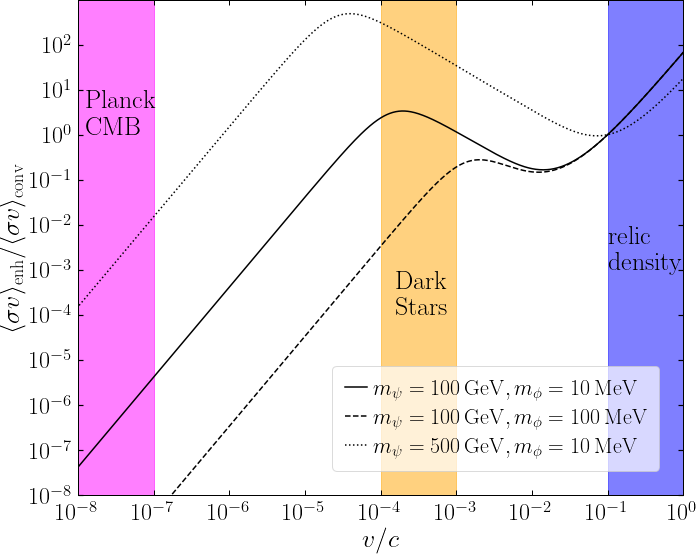

In [11]:
fig = plt.figure(figsize=(10,8))
plt.plot(vel, sigma_v1, 'k-', label = r'$m_\psi = 100\,{\rm GeV}, m_\phi = 10\,{\rm MeV}$')
plt.plot(vel, sigma_v2, 'k--', label = r'$m_\psi = 100\,{\rm GeV}, m_\phi = 100\,{\rm MeV}$')
plt.plot(vel3, sigma_v33, 'k:',  label = r'$m_\psi = 500\,{\rm GeV}, m_\phi = 10\,{\rm MeV}$')
plt.fill_between(x = [0.1, 1], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'blue')
plt.fill_between(x = [10**(-4), 10**(-3)], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'orange')
plt.fill_between(x = [10**(-8), 10**(-7)], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'magenta')
plt.text(10**(-7.9), 1, s = "Planck \n CMB", color = 'black', fontsize = 26)
plt.text(10**(-3.8), 10**(-4), s = "Dark \n Stars", color = 'black', fontsize = 26)
plt.text(10**(-1), 10**(-3), s = "relic\n density", color = 'black', fontsize = 26)
ax = plt.axes()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$v/c$')
plt.ylabel(r'$\langle\sigma v\rangle_{\rm enh}/\langle\sigma v\rangle_{\rm conv}$')
plt.xticks(np.logspace(-9,0,num=10))
plt.yticks(np.logspace(-8,2,num=11))
plt.ylim(10**(-8),1000)
plt.xlim(10**(-8), 1)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()
fig.savefig('Sommerfeld.pdf')

In [ ]:
print(S1[-1])
print(S2[-1])

In [ ]:
print(alpha1)
print(alpha2)

In [ ]:
type(1)

In [ ]:
type([1])

In [ ]:
np.tanh(1000)

In [ ]:
np.where(np.in1d(sigma_v3,[np.inf]))

In [ ]:
print(sigma_v3)